## Dataset

#### Description

In this experiment, we will use the CIFAR-10 dataset. It consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

**The code returns the contents of each data file as a dictionary**.

There are 8 pickled (To know more about pickle refer **Python_Pickle_Introduction** notebook )files in the CIFAR-10 directory.

    1. batches.meta

    2. data_batch_1

    3. data_batch_2	

    4. data_batch_3

    5. data_batch_4	

    6. data_batch_5

    7. readme.html

    8. test_batch

Getting into details of this dataset:


**data** : A 50,000x3072 numpy array of unsigned integers. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** : A list of 50,000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.



### DataSource

https://www.cs.toronto.edu/~kriz/cifar.html

#### Perceptron


A perceptron has one or more inputs, a bias, an activation function, and a single output. The perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output. 


### Setup Steps

In [7]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp3/AIML_DS_CIFAR-10_STD.zip")
ipython.magic("sx unzip AIML_DS_CIFAR-10_STD.zip")


['Archive:  AIML_DS_CIFAR-10_STD.zip',
 '   creating: AIML_DS_CIFAR-10_STD/',
 '  inflating: AIML_DS_CIFAR-10_STD/cifar10_deep_features.mat  ',
 '  inflating: AIML_DS_CIFAR-10_STD/cifar10features.mat  ',
 '  inflating: AIML_DS_CIFAR-10_STD/data_batch_1  ',
 '  inflating: AIML_DS_CIFAR-10_STD/test_batch  ',
 '  inflating: AIML_DS_CIFAR-10_STD/data_batch_3  ',
 '  inflating: AIML_DS_CIFAR-10_STD/data_batch_2  ',
 '  inflating: AIML_DS_CIFAR-10_STD/data_batch_5  ',
 '  inflating: AIML_DS_CIFAR-10_STD/data_batch_4  ',
 ' extracting: AIML_DS_CIFAR-10_STD/readme.html  ',
 '  inflating: AIML_DS_CIFAR-10_STD/batches.meta  ']

### Expected time to complete experiment is 60 min

In [0]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import itertools
import operator
import random
import collections
from scipy import stats
from sklearn.metrics import accuracy_score

#### Function to unpickle the data

In [0]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict_1 = pickle.load(fo, encoding='Latin1')
    return dict_1

### Visualizing the images in CIFAR-10 Dataset


When you pass a pickled file to the get_data function it returns features, labels, file names, list of classes of the corresponding file.

In [0]:
def get_data(file):
    dict_1 = unpickle(file)
    X = np.asarray(dict_1['data']).astype("uint8")
    Y = np.asarray(dict_1['labels'])
    names = np.asarray(dict_1['filenames'])
    list_class=(unpickle("AIML_DS_CIFAR-10_STD/batches.meta")['label_names'])
    return X,Y,names,list_class

In [0]:
# Function to visualize the data
def visualize_image(X, Y, names, image_id,size=(5,5)):
    rgb = X[image_id,:]
    plt.figure(figsize = size)
    img = rgb.reshape(3, 32, 32).transpose([1, 2, 0])
    print(img.shape)
    plt.grid(False)
    plt.imshow(img)
    plt.title(names[image_id])
    plt.show()

Class = horse
(32, 32, 3)


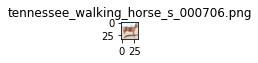

(32, 32, 3)


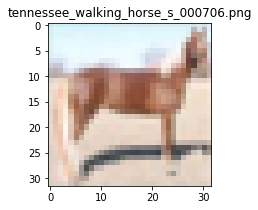

In [12]:
# Read 10000 images -- from batch 3
X, Y, names, classes = get_data("AIML_DS_CIFAR-10_STD/data_batch_3")
# Display the 10th image
pick = 10
print("Class =",classes[Y[pick]])
visualize_image(X, Y, names, pick,size=(0.3,0.3)) # output image would be a blured image
visualize_image(X, Y, names, pick,size=(3,3)) 

**NOTE: **

**The images you see above are pixelated and hence they are  blur.** (Pixelation happens when you display a low resolution of an image on a larger canvas (such a large screen), where each pixel ends up being displayed as an image. You could read more about it on https://whatis.techtarget.com/definition/pixelation ).  This however does not affect the prediction of your machine learning algorithm, for the same reason.

In [0]:
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values


**Let us define a function to calculate accuracy score.**

In [0]:
from sklearn.metrics import accuracy_score
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

**Now let us unpickle the data and labels from CIFAR-10 dataset and divide them into training and testing sets..**

In [0]:
train_features = []
train_labels = []
# Read all training features and labels
for j in "12345": 
    batch_file = 'AIML_DS_CIFAR-10_STD/data_batch_'+ j
    x_train, y_train, names_train, classes_train = get_data(batch_file)
    train_features.extend(x_train)
    train_labels.extend(y_train)

train_features = np.asarray(train_features)
train_labels = np.asarray(train_labels)

# Read all test features and labels
test_features, test_labels, names_test, classes_test = get_data("AIML_DS_CIFAR-10_STD/test_batch")

In [17]:
test_labels.shape, train_labels.shape, test_features.shape, train_features.shape

((10000,), (50000,), (10000, 3072), (50000, 3072))

In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
# Select classes #5 and #7
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, train_features, train_labels)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,test_features, test_labels)

In [20]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.7365

# Task:
Code perceptron from scratch for AND and OR gate.

In [0]:
import pdb
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, alpha=1, epochs=10):
        self.W = np.zeros(input_size+1)
        self.epochs = epochs
        self.alpha = alpha
        self.currLoss = 0
        self.prevLoss = 0
        self.repeat=0
        self.threshhold=10
    
    def activation_fn(self, x):
        #step function
        return 1 if x >= 0.2 else 0
 
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a

    def loss(self,d,y):
      return d- y
 
    def fit(self, X, d):
        for b in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                self.currLoss = self.loss(d[i],y)
                #print(self.currLoss,b)
                self.W = self.W + self.alpha * self.currLoss * x

    def fit_with_early_stopping(self,X,d):
        for b in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                self.currLoss = self.loss(d[i],y)
                self.W = self.W + self.alpha * self.currLoss * x
            if(self.prevLoss==self.currLoss):
                  self.repeat += 1
            self.prevLoss= self.currLoss
            if(self.repeat==4):
                print(" 4 repeats! stopping")
                break
            

In [24]:
X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])
# and
and_out = np.array([0, 0, 0, 1])

perceptron = Perceptron(input_size=2)
perceptron.fit(X, and_out)
print(perceptron.W)

[-2.  2.  1.]


In [25]:
or_out = np.array([0, 1, 1, 1])
perceptron = Perceptron(input_size=2)
perceptron.fit(X, or_out)
print(perceptron.W)

[0. 1. 1.]


Add a code for early stopping and test on XOR gate.

In [31]:
xor_out = np.array([0, 1, 1, 0])
perceptron = Perceptron(input_size=2)
perceptron.fit_with_early_stopping(X, xor_out)
print(perceptron.W)

 4 repeats! stopping
[ 1. -1.  0.]
